# Country Analysis - Italy

The main goal of this analysis is to provide a visual and updated overview of the Covid-19 outbreak in Italy including:
- Time trend overview on national level.
- Overall numbers in a nutshell.
- Analysis on regional level including insights on the four regios with the most active cases.
- Time trend overview on Lombardy: the main hotbed of the Italian outbreak.

The data is updated on daily basis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import chart_studio.plotly as py
import numpy as np
import datetime as datetime
from datetime import date, timedelta
import requests
import io
import warnings

## Data cleaning and formatting

We define a function to get the raw data from the corresponding url and retruning it as a dataframe.
<br>This function allows us to get the latest updates.

In [3]:
def get_raw_data(url):
    req = requests.get(url).content
    return pd.read_csv(io.StringIO(req.decode('utf-8')))

Import the latest reports from the Presidenza del Consiglio dei Ministri - Dipartimento della Protezione Civile. 
<br>There are four datasets:
1. da_national: National data (time series).
2. da_region: Regional data (time series).
3. da_daily_region: Latest daily data on regional level.
4. da_province: Province data.

<br>Date of the latest data to be gathered is yesterday to ensure the data is available as the files are updated daily at midnight. 
<br>We use the date variable "ieri" to build the urls dynamically. The date format used in the Italian repository differs from the one used by the CSSE at Johns Hopkins University, this is why we need to build it.

In [4]:
print_time = date.today() - timedelta(days=1)
ieri = print_time.strftime("%Y%m%d")
print_time = print_time.strftime("%m/%d/%Y")

In [5]:
nat_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
reg_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
reg_daily_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-{}.csv".format(ieri)
prov_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv" 
da_national = get_raw_data(nat_url)
da_region = get_raw_data(reg_url)
da_daily_region = get_raw_data(reg_daily_url)
da_province = get_raw_data(prov_url)

We rename the columns to translate them to English.

In [6]:
#da_national.columns

In [7]:
da_national = da_national.rename(columns={'data':"timestamp", 'stato':"state", 
                            'ricoverati_con_sintomi':"hospitalized with symptoms", 
                            'terapia_intensiva':"intensive care",
                            'totale_ospedalizzati':"total hospitalized",
                            'isolamento_domiciliare':"self-isolation",
                            'totale_positivi':"total currently positive", 
                            'variazione_totale_positivi':"variation of total positive",
                            'nuovi_positivi':"new positive",
                            'dimessi_guariti':"recovered", 
                            'deceduti':"fatalities", 
                            'totale_casi':"total positive", 
                            'tamponi':"total tested"})
da_national.head(2).style.hide_index()

timestamp,state,hospitalized with symptoms,intensive care,total hospitalized,self-isolation,total currently positive,variation of total positive,new positive,recovered,fatalities,total positive,total tested,note_it,note_en
2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,nan,nan
2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,nan,nan


In [8]:
#da_region.columns

In [9]:
da_region = da_region.rename(columns={'data':"date", 'stato':"state", 'codice_regione':"regional code", 
                          'denominazione_regione':"region", 'ricoverati_con_sintomi':"hospitalized with symptoms", 
                          'terapia_intensiva':"intensive care",'totale_ospedalizzati':"total hospitalized", 
                          'isolamento_domiciliare':"self-isolation", 
                          'totale_positivi':"total currently positive", 
                          'variazione_totale_positivi':"variation of total positive",
                          'nuovi_positivi':"new positive",'dimessi_guariti':"recovered", 
                          'deceduti':"fatalities", 'totale_casi':"total positive", 'tamponi':"total tested"})
da_region.tail(2).style.hide_index()

date,state,regional code,region,lat,long,hospitalized with symptoms,intensive care,total hospitalized,self-isolation,total currently positive,variation of total positive,new positive,recovered,fatalities,total positive,total tested,note_it,note_en
2020-04-17T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,108,9,117,374,491,-27,22,379,123,993,4366,nan,nan
2020-04-17T17:00:00,ITA,5,Veneto,45.434905,12.338452,1359,197,1556,9062,10618,-182,384,3730,1026,15374,236722,nan,nan


In [10]:
#da_daily_region.columns

In [11]:
da_daily_region = da_daily_region.rename(columns={'data':"date", 'stato':"state", 'codice_regione':"regional code", 
                          'denominazione_regione':"region", 'ricoverati_con_sintomi':"hospitalized with symptoms", 
                          'terapia_intensiva':"intensive care",'totale_ospedalizzati':"total hospitalized", 
                          'isolamento_domiciliare':"self-isolation", 
                          'totale_positivi':"total currently positive", 
                          'variazione_totale_positivi':"variation of total positive",
                          'nuovi_positivi':"new positive",'dimessi_guariti':"recovered", 
                          'deceduti':"fatalities", 'totale_casi':"total positive", 'tamponi':"total tested"})
da_daily_region.head(2).style.hide_index()

date,state,regional code,region,lat,long,hospitalized with symptoms,intensive care,total hospitalized,self-isolation,total currently positive,variation of total positive,new positive,recovered,fatalities,total positive,total tested,note_it,note_en
2020-04-17T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,319,43,362,1580,1942,92,97,255,246,2443,25436,nan,nan
2020-04-17T17:00:00,ITA,17,Basilicata,40.639471,15.805148,59,9,68,198,266,-7,1,49,22,337,5710,nan,nan


## Time trends on national level 

In [12]:
rng = da_national["timestamp"]
rng = [datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S').strftime("%m/%d") for x in rng]

<function matplotlib.pyplot.show(*args, **kw)>

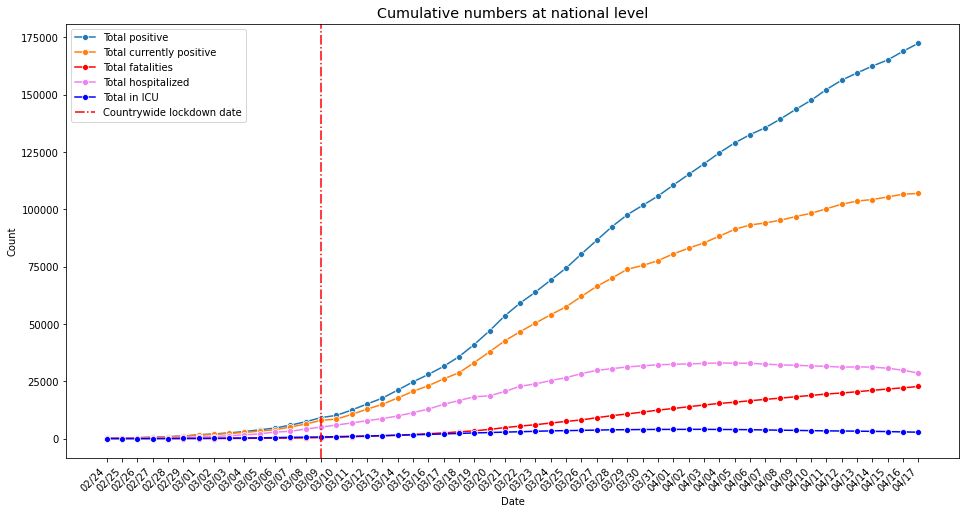

In [13]:
plt.figure(figsize=(16,8))
plt.title("Cumulative numbers at national level", size="x-large")
da_national["date"] = rng
sns.lineplot(x=da_national["date"], y=da_national["total positive"], 
             label = "Total positive", marker = "o")
sns.lineplot(x=da_national["date"], y=da_national["total currently positive"], 
             label = "Total currently positive", marker = "o")
sns.lineplot(x=da_national["date"], y=da_national["fatalities"], 
             label = "Total fatalities", marker = "o", color = "red")
sns.lineplot(x=da_national["date"], y=da_national["total hospitalized"], 
             label = "Total hospitalized", marker = "o", color="violet")
sns.lineplot(x=da_national["date"], y=da_national["intensive care"], 
             label = "Total in ICU", marker = "o", color="blue").set(xlabel = "Date", ylabel = "Count")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.axvline(x="03/09", ls="-.", c="red", label = "Countrywide lockdown date")
plt.legend(fontsize="medium")
plt.show

Active cases keep growing on national level, however the growth of new cases has been slowing down since the beginning of April. If the currently positive curve continues to follow the trends from [China and Korea](covid-19_analysis.html), the growth could be expected until at least one month since the countrywide lockdown started.

## Country numbers in a nutshell

In [14]:
print("Overall status as on {}:".format(rng[-1])) 

Overall status as on 04/17:


In [15]:
latest = da_national.loc[:,['total tested','total positive', 'total currently positive',
                            'recovered','self-isolation','total hospitalized',
                            'intensive care','fatalities']].tail(1)
latest["death rate [%]"] = 100*latest["fatalities"]/latest["total positive"]
latest.head().style.hide_index()

total tested,total positive,total currently positive,recovered,self-isolation,total hospitalized,intensive care,fatalities,death rate [%]
1244108,172434,106962,42727,78364,28598,2812,22745,13.190554


In [16]:
ind = len(da_national) -1
perc = latest.drop(["total tested","death rate [%]"], axis=1)
perc = 100*perc/latest.loc[ind,"total tested"]

#### From all tested population we have the following figures in terms of percentage:

In [17]:
round(perc,2).style.hide_index()

total positive,total currently positive,recovered,self-isolation,total hospitalized,intensive care,fatalities
13.860000,8.600000,3.430000,6.300000,2.300000,0.230000,1.830000


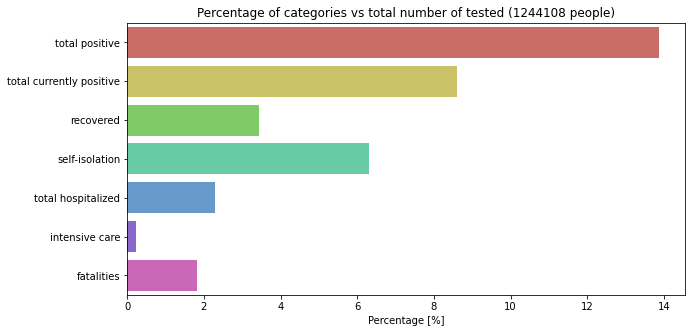

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Percentage of categories vs total number of tested ({} people)".format(latest.loc[ind,"total tested"]), 
          size="large")
ax = sns.barplot(data=perc, 
     orient="h",
     palette = 'hls').set(xlabel = "Percentage [%]")

## Analysis on regional level

In [19]:
da_daily_region["percentage of active [%]"] = round(100*da_daily_region[
                                    "total currently positive"]/latest.loc[ind,"total currently positive"],2)
da_daily_region["percentage of total positive [%]"] = round(
                                    100*da_daily_region["total positive"]/latest.loc[ind,"total positive"],2)

In [20]:
summary_daily_region = da_daily_region[["region","total tested","total positive","total currently positive",
                 "percentage of active [%]",
                 "percentage of total positive [%]"]].sort_values(
                 by="total currently positive", ascending=False).head(4)

In [22]:
fig = px.treemap(da_daily_region,
                 path=['region'],
                 values= da_daily_region['total positive'],
                 title='Regions with Active Cases in Italy: Status on {}'.format(print_time),
                 hover_data=['total positive', 'total currently positive', 'recovered','fatalities'],
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()
plt.savefig('Italy_reg.png', dpi=300)

<Figure size 432x288 with 0 Axes>

### Top four regions with most active cases

Lombardia is the region with the bigest share of cases of those currently active. 
<br>As the outbreak hit Lombardia first, the number of fatalities and recovered cases are higher, explaining the lower number of currently cases in comparison to the total of cases. As of 30.03 the number of active cases in the region is slowing down.
<br>In the other regions, the outbreak started more recently, therefore the actual positive and total positive in those regions are very close to each other and the curve of active cases keeps growing.

In [23]:
summary_daily_region.style.hide_index()

region,total tested,total positive,total currently positive,percentage of active [%],percentage of total positive [%]
Lombardia,243513,64135,33434,31.260000,37.190000
Piemonte,86714,19803,13998,13.090000,11.480000
Emilia-Romagna,116826,21834,13585,12.700000,12.660000
Veneto,236722,15374,10618,9.930000,8.920000


In [24]:
top_four_italy = summary_daily_region["region"]

In [25]:
top_four_italy = top_four_italy.reset_index(drop=True)

In [26]:
#top_four_italy[1]

In [27]:
reg_1 = da_region[da_region["region"] == top_four_italy[0]]
reg_2 = da_region[da_region["region"] == top_four_italy[1]]
reg_3 = da_region[da_region["region"] == top_four_italy[2]]
reg_4 = da_region[da_region["region"] == top_four_italy[3]]

In [28]:
#reg_4[["date","total currently positive"]].head()

In [29]:
def time_formatter(da):
    rng = da["date"]
    rng = [datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S').strftime("%b %d") for x in rng]
    da["date"] = rng
    return da

In [30]:
warnings.filterwarnings("ignore")
reg_1 = time_formatter(reg_1)
reg_2 = time_formatter(reg_2)
reg_3 = time_formatter(reg_3)
reg_4 = time_formatter(reg_4)

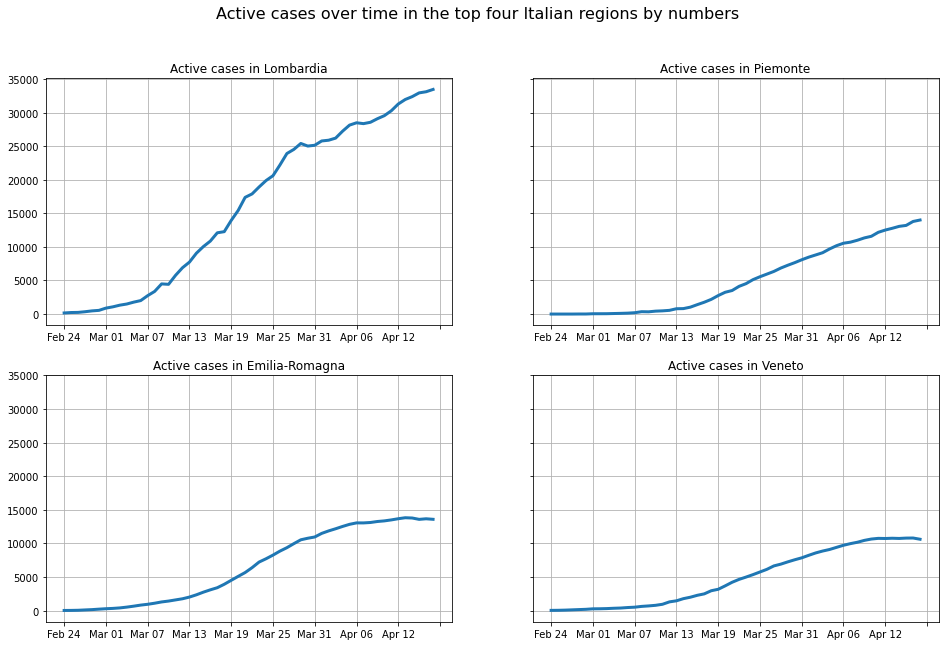

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(16,10), sharey=True)


def plot_top4_it(da,num,xcol, ycol, title):
    ax[num].plot(da[xcol],da[ycol], lw=3)
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(10))
    ax[num].grid(True)
    
plot_top4_it(reg_1, (0,0), "date", "total currently positive", 'Active cases in {}'.format(top_four_italy[0]))
plot_top4_it(reg_2, (0,1), "date", "total currently positive", 'Active cases in {}'.format(top_four_italy[1]))
plot_top4_it(reg_3, (1,0), "date", "total currently positive", 'Active cases in {}'.format(top_four_italy[2]))
plot_top4_it(reg_4, (1,1), "date", "total currently positive", 'Active cases in {}'.format(top_four_italy[3]))
fig.suptitle('Active cases over time in the top four Italian regions by numbers', fontsize=16)

plt.show()

In [32]:
top_italy = da_daily_region.sort_values(by="total currently positive", ascending=False)["region"].head(4)

## Time trend in Lombardia

In [33]:
lomb_active_time = da_region[da_region["region"]=="Lombardia"][["date","total currently positive","fatalities","recovered"]]

<function matplotlib.pyplot.show(*args, **kw)>

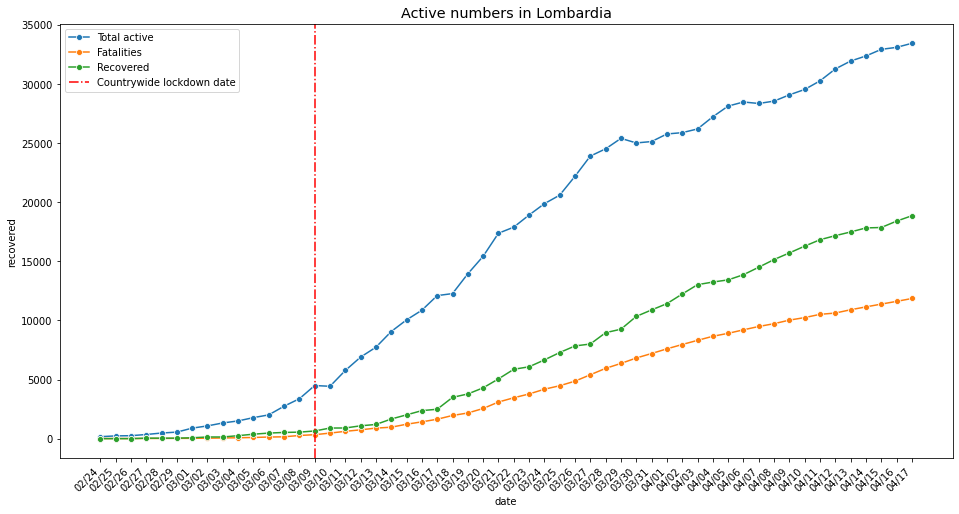

In [34]:
plt.figure(figsize=(16,8))
plt.title("Active numbers in Lombardia", size="x-large")
rng = lomb_active_time["date"]
rng = [datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S').strftime("%m/%d") for x in rng]
lomb_active_time["date"] = rng
sns.lineplot(x=lomb_active_time["date"], y=lomb_active_time["total currently positive"], 
             label = "Total active", marker = "o")
sns.lineplot(x=lomb_active_time["date"], y=lomb_active_time["fatalities"], 
             label = "Fatalities", marker = "o")
sns.lineplot(x=lomb_active_time["date"], y=lomb_active_time["recovered"], 
             label = "Recovered", marker = "o")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.axvline(x="03/09", ls="-.", c="red", label = "Countrywide lockdown date")
plt.legend(fontsize="medium")
plt.show

As of 31.03, the peak of active cases is registered on 29.03. However, the number of active cases started to grow again in the first week of April, so the peak of cases hasn't been reached yet.
<br> Looking at the trends in [China and Korea](covid-19_analysis.html), for the former the trend flattened for about five days after the peak before starting to go down; for the latter, there were 5 days of oscillations after the peak value until the curve started to go down steadily.  